# 今回の実施内容
線形回帰をスクラッチで作成することが目的である。そのため、テストデータ分割はsklearnのtrain_test_splitを利用する  
データはhousePriceのデータを利用する

In [1]:
# 平均二乗誤差の計算
def MSE(y_pred, y):
    # 行数をカウントする
    num = len(y_pred)
    
    # 平均二乗和誤差を取得する
    mse = np.sum((y_pred - y)**2)/2*num
    return mse

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv("/Users/tsuneo/kaggle/houseprice/train.csv")
test = pd.read_csv("/Users/tsuneo/kaggle/houseprice/test.csv")

In [4]:
# 訓練データを2変数だけに限定
X = train[["GrLivArea","YearBuilt"]].values
X.shape

(1460, 2)

In [5]:
# 正解ラベル（教師データ）を作成する
y = train[["SalePrice"]].values

In [6]:
# データ分割のためのモジュールをインポートする
from sklearn.model_selection import train_test_split

In [7]:
# 本当は自分で作成すべきだが、今回はsklearnを利用する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
class ScratchLinearRegression():
    def __init__(self):
        self.theta = np.random.rand(1,2).T  # 重みの初期値
        self.α = 0.00000000001 # 学習率
        self.iteration = 30000       # イテレーション回数
        self.cost_list = []        # 損失値をリスト化しておく
        self.theta_list = []      # 重みパラメータをリスト化しておく
    
    # 重みを算出する処理
    def fit(self, X_train, y_train):
        self._gradient_decent(X_train, y_train) 
    
    # 平均二乗誤差を計算する。MSEは共通の関数を作っておき呼び出す
    def _compute_cost(self, X_tarin, y_train):
        y_pred = np.dot(X_train, self.theta)
        los = MSE(y_pred, y_train)
        return los
    
    # 勾配降下法で重みを更新する
    # メンバ変数を参照したかったら、第一引数にselfをつけること
    def _gradient_decent(self, X_train, y_train):
        for i in range(self.iteration):
            # 仮定関数（予測値）と教師データとの差分を取得し、転置する
            A = (np.dot(X_train, self.theta) - y_train).T
        
            # 重みを更新する
            self.theta =  self.theta -  (self.α/len(X_train))*np.sum(np.dot(A, X_train))
        
            #　損失値を取得する
            cost = self._compute_cost(X_train, y_train)
        
            # 格納していく
            self.theta_list.append(self.theta)
            self.cost_list.append(cost)
        
    def predict(self, X_test):
        final_answer = np.dot(X_test, self.theta)
        return final_answer

In [9]:
# インスタンス化する
slr = ScratchLinearRegression()

In [10]:
# 重みパラメータを求める（学習する）
slr.fit(X_train, y_train)

In [11]:
# テストデータで予測する
a= slr.predict(X_test)
len(a)

292

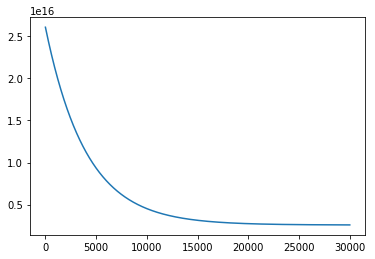

In [12]:
# 損失曲線をグラフ化して見る
plt.plot(slr.cost_list)

# テストデータの分割

In [19]:
def _train_test_split(X, y, train_size):
    # NumPy配列にする（pandasのdataframeを受け取ることを想定して）
    X = np.array(X)
    line_X = len(X) * train_size
    line_X = int(line_X)
    X_train = X[:line_X, :]
    X_test = X[line_X:-1, :]
    
    y = np.array(y)
    line_y = len(y) * (1- train_size)
    #print("bb",line_y)
    line_y = int(line_y)
    y_train = y[:line_y, :]
    y_test = y[line_y:-1, :]

    return X_train, X_test, y_train, y_test

In [21]:
a,b,c,d = _train_test_split(X, y, train_size=0.8)

In [24]:
a.shape, b.shape, c.shape, d.shape

((1168, 2), (291, 2), (291, 1), (1168, 1))

# 説明
## 前提知識
### 機械学習全般

**・教師あり学習とは**、正解データと訓練データの組み合わせで学習すること  

**・分類問題：**犬、猫など場合分したい場合（クラスラベルを予測する）  

**・回帰問題：**身長・体重のデータセットで学習して、その中に含まれていない身長から体重を算出したい場合（連続値を予測する）

**・教師なし学習とは**、学習時に答えとなるデータがない学習。クラスタリングを行う学習のこと。データ間の隠れたパターンや構造を見つける。

### フィーチャースケーリング

**・正規化**  
特徴量の値の範囲を一定の範囲におさめる変換になります。主に[0, 1]か、[-1, 1]の範囲内におさめることが多いです。

**・標準化**  
標準化とは、特徴量の平均を0、分散を1にする変換になります。

**・正規化と標準化の使い分け**  
基本は、標準化を用います。正規化だと、外れ値が強く影響してしまうからです。標準化であれ、変換後も外れ値は外れ値として扱われます。  

正規化は、画像処理におけるRGBの強さ[0,255]
sigmoid, tanhなどの活性化関数を用いるNNのいくつかのモデル[0,1], [-1,1]
の場合  
外れ値がある場合などにも有効で、多く使われています。

標準化は、ロジスティック回帰、SVM、NNなど勾配法を用いだモデル
kNN, k-meansなどの距離を用いるモデル
PCA, LDA, kernel PCA などのfeature extractionの手法
の場合  
正規化とは違い、minとmaxが固定されていません。ただ、平均と分散を計算すると、0と1になります。

**・フィーチャースケーリングのメリット**  
単位系や次元が違うもの同士でも比較ができるようになること。



## θの役割

線形回帰モデルは、以下のように $θ_0$つまり、切片が存在する。  
$h_θ(x) = θ_0x_0 + θ_1x_1 +　・・・　+ θ_nx_n(x_o = 1)$  
$θ_0$が線形回帰モデルにおいてどのように役立っているか述べよ。切片が存在しない場合、モデルの表現力はどうなるかを考えると良い。

例えば、築年数が０年（新築）のとき切片がないと販売価格が0円になってしまいます。 つまり、説明変数の値が0のときの値を正しく表現するために切片が必要となります。

## 学習率
学習率について、どのような値から選択するべきか、それはなぜかを述べよ。以下のキーワードを用いること。

学習率は人間が決めるハイパーパラメータの一種です。

**・Overfitting（過学習）**  
学習率(learning late)を小さく設定すると、更新幅が小さいので、最適なところまで辿りつくまで時間が掛かることが懸念される。


**・Underfitting**  
学習率(learning late)を比較的大きく設定すると、更新する幅が大きいためなかなか最適解に収束しない可能性がある。場合によっては発散する場合もある。

## 学習曲線
以下の内容を含め学習曲線について述べよ。  
・どのような時に使用するか  
・学習曲線からどのようなことが分かるか

学習曲線はコストを最適化するような問題に対して学習をステップで実行するような学習方法を使う際に使われます。

学習曲線は学習回数とコストのプロットした結果になります。これでその学習率で収束したかどうか、収束速度がひと目で分かるため学習率のチューニングに使用されます。

## 正規方程式
係数θを求める方法として、最急降下法（Gradient Descent）を使用するのではなく、正規方程式（Normal Equation）を使用する方法がある。最急降下法と正規方程式のメリットとデメリットを計算量と計算速度の観点から述べよ。

| 最急降下法（gradient descent） | 正規方程式（normal equation） |
|:-----------|------------:|
|学習率の設定が必要 | 学習率を設定する必要なし |
| 計算を繰り返す（ループ処理をする）必要がある | ループ処理の必要なし |
|学習率のチューニングが必要|逆行列の計算があるため特徴量、データ数が増えると遅くなる|

参考サイト
https://omedstu.jimdo.com/2018/04/21/%E6%AD%A3%E8%A6%8F%E6%96%B9%E7%A8%8B%E5%BC%8F/

## 更新式の導出
最急降下法の更新式が導出される過程を説明せよ。

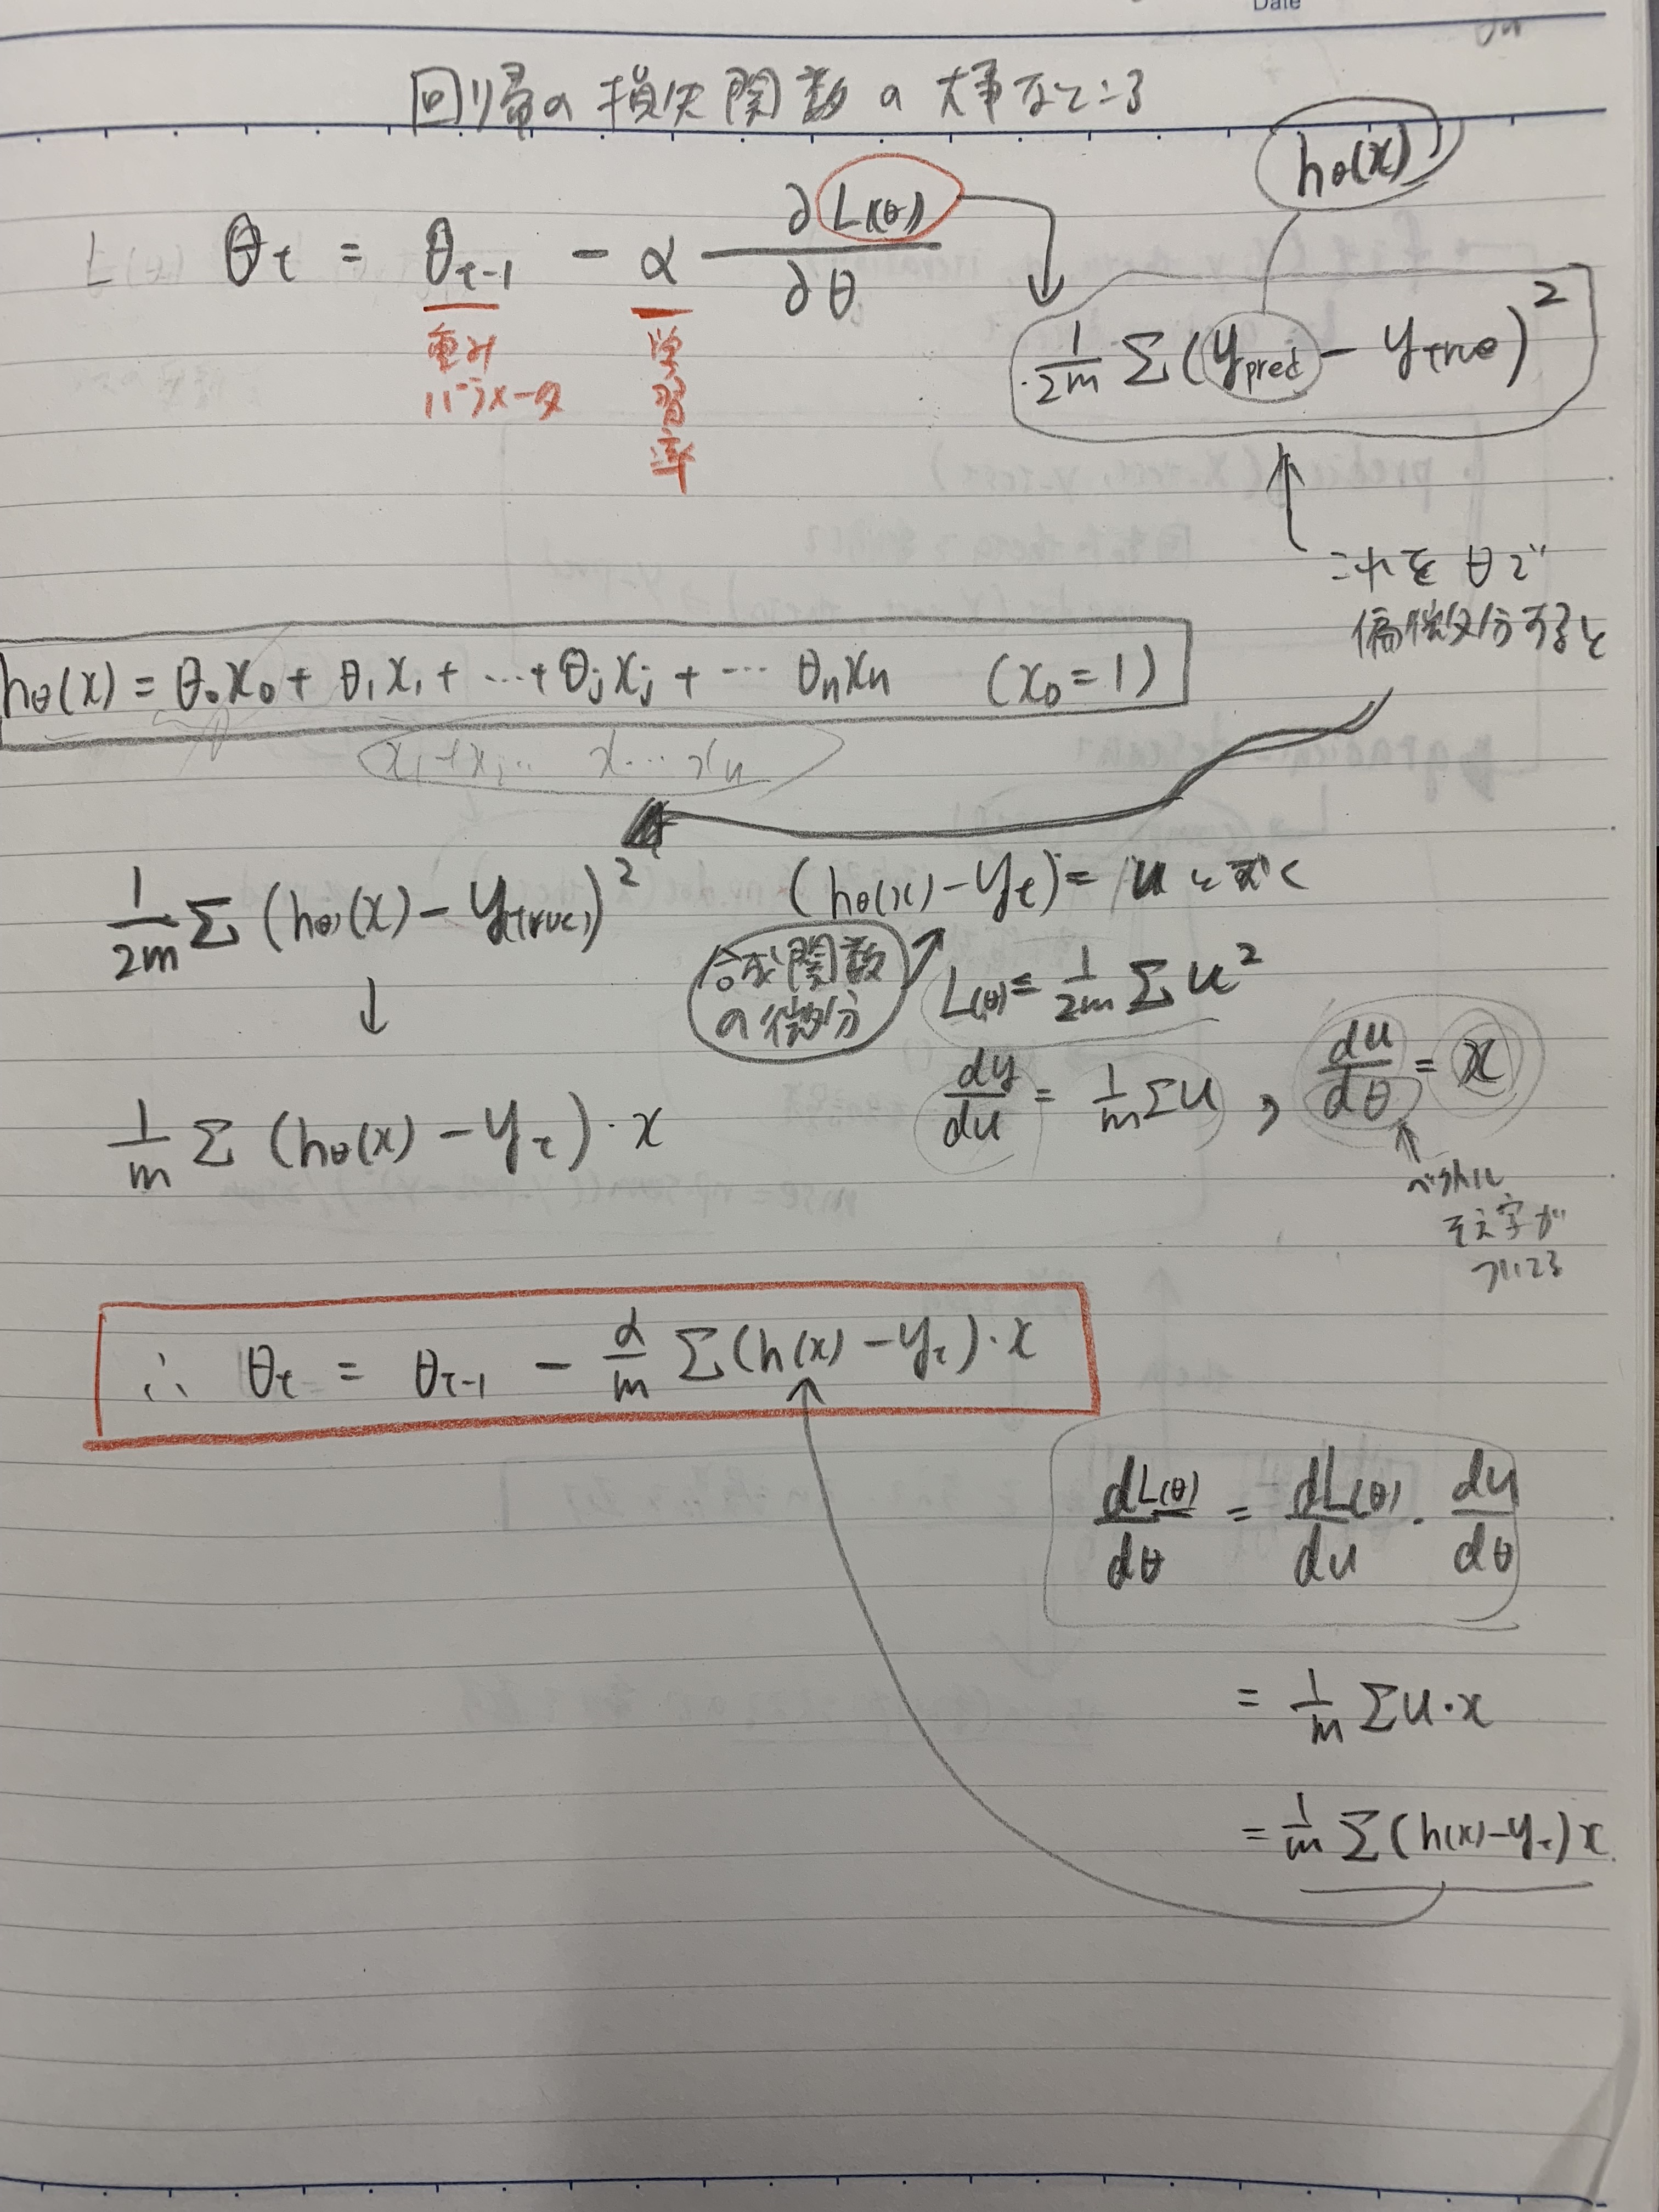

## 局所最適解の問題
最急降下法には一般的に局所最適解の問題がある。しかし、線形回帰では学習を続ければ必ず最適解を求めることができる。それはなぜか数式やグラフを用いて説明せよ。

下記の場合は3付近の値からスタートするとコストが−２０に収束してしまうが、実際には-60が最小値が存在する。 このため最急勾配法では初期値によって局所解に陥る可能性がある。

線形回帰の場合は二乗誤差関数のため各θが２乗関数のため必ず最小値が１つのため最適解が求められる。

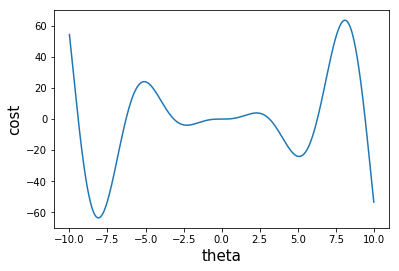

In [33]:
x = np.arange(-10, 10, 0.01)
y = np.sin(x)*x**2
plt.xlabel('θ', fontsize=15)
plt.ylabel('cost', fontsize=15)
plt.plot(x,y)